Using Energy efficiency dataset to train the model.\
The dataset is available on UCI Machine Learning Repository.

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import keras
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [ ]:
df.shape

(1296, 12)

In [ ]:
df.isna().sum()

X1              528
X2              528
X3              528
X4              528
X5              528
X6              528
X7              528
X8              528
Y1              528
Y2              528
Unnamed: 10    1296
Unnamed: 11    1296
dtype: int64

The dataset has 8 independent features and 2 dependent features.\
Removing the unwanted columns and rows with NULL entries.

In [ ]:
df.drop(['Unnamed: 10','Unnamed: 11'],axis='columns',inplace=True)
df.dropna(axis = 'rows', inplace=True)
df.shape

(768, 10)

In [ ]:
x = df.iloc[:,:8]
y1 = df['Y1']
y2 = df['Y2']
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0


In [ ]:
y1 = np.array(y1)
y2 = np.array(y2)
y1[:5],y2[:5]

(array([15.55, 15.55, 15.55, 15.55, 20.84]),
 array([21.33, 21.33, 21.33, 21.33, 28.28]))

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x)
x = std.transform(x)
print(x[0])

[ 2.04177671 -1.78587489 -0.56195149 -1.47007664  1.         -1.34164079
 -1.76044698 -1.81457514]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test,y2_train,y2_test = train_test_split(x,y1,y2,test_size=0.2)

In [ ]:
y1_train.shape,y2_train.shape

((614,), (614,))

Models training and prediction using Functional API

In [ ]:
from keras.models import Model

def build_model():
  input = Input(shape=(8,))
  dense1 = Dense(128,activation='relu')(input)
  dense2 = Dense(64, activation = 'relu')(dense1)

  output1 = Dense(1, name='out1')(dense2)
  dense3 = Dense(32,activation = 'relu')(dense2)
  output2 = Dense(1, name = 'out2')(dense3)

  model = Model(inputs=input,outputs=[output1,output2])
  return model

In [ ]:
model = build_model()

In [ ]:
model.compile(optimizer='adam',loss = {'out1':'mse','out2':'mse'})

In [ ]:
his = model.fit(x = x_train, y=[y1_train,y2_train],epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 1289.8102 - out1_loss: 593.8955 - out2_loss: 695.9148
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 1139.9880 - out1_loss: 501.4126 - out2_loss: 638.5754
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 733.0480 - out1_loss: 331.3527 - out2_loss: 401.6953
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 237.4710 - out1_loss: 139.4625 - out2_loss: 98.0085
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 116.6005 - out1_loss: 55.7468 - out2_loss: 60.8537
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 75.3352 - out1_loss: 34.2225 - out2_loss: 41.1127
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 67.7224 - out1_loss: 30.8642 - out2_loss: 36.8582
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 53.5623 - out1_loss: 24.4901 - out2_loss: 29.0722
Ep

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
len(y_pred)

2

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print('Error for y1: ', mse(y_pred[0],y1_test))
print('Error for y2: ', mse(y_pred[1],y2_test))

Error for y1:  4.505285977111166
Error for y2:  5.263034222730879


In [ ]:
print('Predicted values: ',y_pred[0][:5])
print('Actual values: ',y1_test[:5])

Predicted values:  [[14.178672]
 [12.26509 ]
 [16.640678]
 [40.35176 ]
 [12.589118]]
Actual values:  [14.62 12.12 16.44 40.57 11.34]


In [ ]:
print('Predicted values: ',y_pred[1][:5])
print('Actual values: ',y2_test[:5])

Predicted values:  [[15.817106]
 [14.428451]
 [16.812025]
 [38.348125]
 [15.129458]]
Actual values:  [16.88 14.97 17.1  40.47 14.87]


Visualisation

In [ ]:
import matplotlib.pyplot as plt
his_dict = his.history
his_dict.keys()

dict_keys(['loss', 'out1_loss', 'out2_loss'])

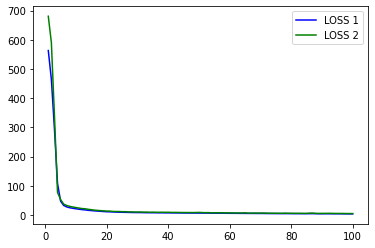

In [ ]:
loss1 = his.history['out1_loss']
loss2 = his.history['out2_loss']
epochs = list(range(1,len(loss1)+1))
plt.plot(epochs,loss1,'b',label='LOSS 1')
plt.plot(epochs,loss2,'g',label='LOSS 2')
plt.legend()
plt.show()

Since the error corresponding to y2 is very high, we use a different model to train and tune the parameters.

Using custom model and custom loss function for model training.

In [ ]:
from keras.layers import Layer

# custom dense layer
class SimpleDense(Layer):
  def __init__(self, units=32, activation= None):  # by default a dense layer of 32 units
    super(SimpleDense, self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)
    
  def build(self, input_shape):  # Initializing trainable weights and biases
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name = 'kernel', initial_value = w_init(shape = (input_shape[-1],self.units),dtype = 'float32'), trainable= True)

    b_init = tf.zeros_initializer()
    self.b = tf.Variable(name = 'bias', initial_value = b_init(shape = (self.units,),dtype = 'float32'), trainable= True)

  def call(self, inputs):  # defines computation, called by constructor of the class
    return(self.activation(tf.matmul(inputs,self.w)+self.b))

In [ ]:
# custom loss function: huber loss
from keras.losses import Loss
class myHuberLoss(Loss):
  threshold = 0.5
  def __init__(self, threshold):
    super().__init__()
    self.threshold = threshold
  
  def call(self,y_true,y_pred):
    error = y_true-y_pred
    is_small_error = tf.abs(error)<=self.threshold
    small_error_loss = tf.square(error)*0.1
    big_error_loss = self.threshold * (tf.abs(error)- 0.5 * self.threshold)
    return tf.where(is_small_error, small_error_loss, big_error_loss)  # (condition, if true, else)


In [ ]:
from keras.models import Model

def build_model2():
  model = Sequential([
                      Dense(16, activation='relu', input_shape = (8,)),
                      SimpleDense(units=32, activation = 'relu'),
                      SimpleDense(units = 64, activation = 'relu'),
                      SimpleDense(1)
  ])
  return model

In [ ]:
model2 = build_model2()
model2.compile(optimizer= 'adam', loss = myHuberLoss(threshold=0.8))

In [ ]:
his2 = model2.fit(x_train,y = y2_train, epochs=500, validation_split=0.1, callbacks= [keras.callbacks.EarlyStopping(patience=20, monitor = 'val_loss', restore_best_weights=True)])

Epoch 1/500
18/18 [==============================] - 1s 25ms/step - loss: 19.3724 - val_loss: 18.4254
Epoch 2/500
18/18 [==============================] - 0s 3ms/step - loss: 19.2466 - val_loss: 17.9912
Epoch 3/500
18/18 [==============================] - 0s 3ms/step - loss: 18.6333 - val_loss: 16.2405
Epoch 4/500
18/18 [==============================] - 0s 3ms/step - loss: 15.9255 - val_loss: 11.0918
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 10.2590 - val_loss: 7.9742
Epoch 6/500
18/18 [==============================] - 0s 3ms/step - loss: 7.5800 - val_loss: 5.5815
Epoch 7/500
18/18 [==============================] - 0s 3ms/step - loss: 4.7716 - val_loss: 4.7620
Epoch 8/500
18/18 [==============================] - 0s 3ms/step - loss: 4.3178 - val_loss: 4.1412
Epoch 9/500
18/18 [==============================] - 0s 4ms/step - loss: 3.6007 - val_loss: 3.7698
Epoch 10/500
18/18 [==============================] - 0s 3ms/step - loss: 3.4352 - val_loss: 3.5716

In [ ]:
y_pred2 = model2.predict(x_test)

In [ ]:
# Calculating the mean squared error
from sklearn.metrics import mean_squared_error as mse
print('Error for y2: ', mse(y_pred2,y2_test))

Error for y2:  3.6741492529416266


In [ ]:
print('Predicted values: ',y_pred2[:5])
print('Actual values: ', y2_test[:5])

Predicted values:  [[16.183826]
 [14.751948]
 [17.38741 ]
 [39.156754]
 [14.948108]]
Actual values:  [16.88 14.97 17.1  40.47 14.87]


Visualisation of loss vs epoch

In [ ]:
his2.history.keys()

dict_keys(['loss', 'val_loss'])

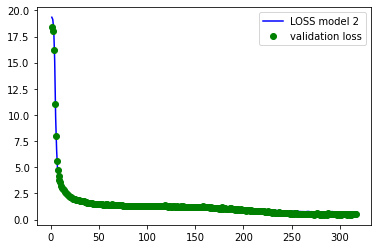

In [ ]:
loss2 = his2.history['loss']
val_loss = his2.history['val_loss']
epochs = list(range(1,len(loss2)+1))
plt.plot(epochs,loss2,'b',label='LOSS model 2')
plt.plot(epochs,val_loss,'go',label='validation loss')
plt.legend()
plt.show()

Some small changes in loss fucntion improved the performance of the model. The updated huber loss function reduced the speed of updating weights and biases for smaller loss.\
Early stopping was used to restore the best parameters to train the model.

Functional API was implemented, losses were compared. A custom dense layer was designed. The custom huber loss function improved the model performance by some extent.